<b>Universidad Galileo</b><br/>
<b>Maestría de Ciencia de Datos</b><br/>
<b>Text Mining & Image Recognition</b><br/>
<b>Jose Godoy</b><br/>
<b>Carnet 22000570</b><br/>
<b>22 de julio 2022</b><br/>

Cargando librerías

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (8, 6)

Las imagenes originales utilizadas en esta hoja de trabajo son las siguientes:

Text(0.5, 1.0, 'Bruno (R.I.P)')

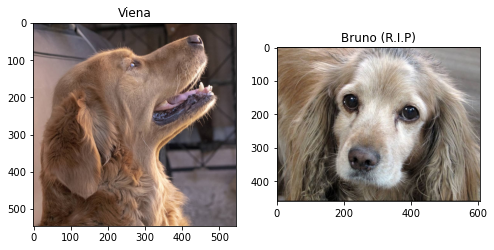

In [2]:
viena = cv2.imread("viena.jpg")
viena = cv2.cvtColor(viena, cv2.COLOR_BGR2RGB)

bruno = cv2.imread("bruno.jpg")
bruno = cv2.cvtColor(bruno, cv2.COLOR_BGR2RGB)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(viena)
axarr[0].set_title('Viena')
axarr[1].imshow(bruno)
axarr[1].set_title('Bruno (R.I.P)')

# Problema 1

Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color según los siguientes puntos:

<ul>
    <li>Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.</li>
    <li>Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.</li>
    <li>Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.</li>
    <li>Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde.</li>
    <li>Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul.</li>
    <li>Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y rojo.</li>
</ul>

In [3]:
def ver_imagen(path, color):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #Dimensiones
    alto = img.shape[0]
    ancho = img.shape[1]
    
    #Se crea una imagen vacia a color (3 canales)
    lienzo = np.zeros((alto, ancho, 3))
    
    #Ciclo for por cada imagen
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]
            #Se obtienen los colores
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            #Coloración
            if color == 1:
                lienzo[i, j] = [blue, 0, 0]
            if color == 2:
                lienzo[i, j] = [0, green, 0]
            if color == 3:
                lienzo[i, j] = [0, 0, red]
            if color == 10:
                lienzo[i, j] = [0, green, red]
            if color == 20:
                lienzo[i, j] = [blue, green, 0]
            if color == 30:
                lienzo[i, j] = [blue, 0, red]
    #Se debe escribir a disco y después leer
    cv2.imwrite("problema1.jpg", lienzo)
    img_edited = cv2.imread("problema1.jpg")
    img_edited = cv2.cvtColor(img_edited, cv2.COLOR_BGR2RGB)
    
    #Regresando imagen
    return img_edited

Probando función:

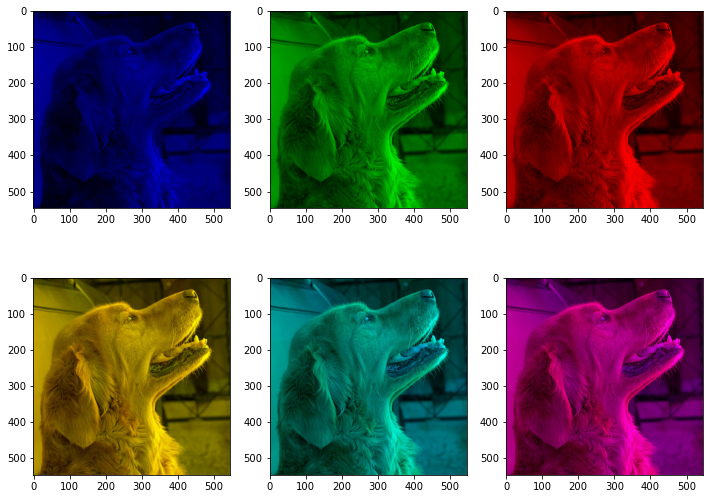

In [4]:
mi_imagen_azul = ver_imagen("viena.jpg", 1)
mi_imagen_verde = ver_imagen("viena.jpg", 2)
mi_imagen_rojo = ver_imagen("viena.jpg", 3)

mi_imagen_rojo_verde = ver_imagen("viena.jpg", 10)
mi_imagen_verde_azul = ver_imagen("viena.jpg", 20)
mi_imagen_azul_rojo = ver_imagen("viena.jpg", 30)

#Graficando

plt.rcParams["figure.figsize"] = (12, 9)
f, axarr = plt.subplots(2,3)
axarr[0,0].imshow(mi_imagen_azul)
axarr[0,1].imshow(mi_imagen_verde)
axarr[0,2].imshow(mi_imagen_rojo)

axarr[1,0].imshow(mi_imagen_rojo_verde)
axarr[1,1].imshow(mi_imagen_verde_azul)
axarr[1,2].imshow(mi_imagen_azul_rojo)

# Problema 2

En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises (imagen1, imagen2, perro) estas imágenes fueron creadas utilizando una escala de grises en 3D, cree una función que dadas las 3 imágenes se construya la imagen original a color.

In [5]:
def unir_y_colorear_imagen(path_azul, path_verde, path_rojo):
    #Cargando imagenes
    img_azul = cv2.imread(path_azul)
    img_azul = cv2.cvtColor(img_azul, cv2.COLOR_BGR2RGB)
    
    img_verde = cv2.imread(path_verde)
    img_verde = cv2.cvtColor(img_verde, cv2.COLOR_BGR2RGB)
    
    img_rojo = cv2.imread(path_rojo)
    img_rojo = cv2.cvtColor(img_rojo, cv2.COLOR_BGR2RGB)
    
    #Dimensiones
    alto = img_azul.shape[0]
    ancho = img_azul.shape[1]
    
    #Se crea una imagen vacia a color (3 canales)
    lienzo = np.zeros((alto, ancho, 3))
    
    #Ciclo for por cada imagen
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel_img_azul = img_azul[i, j][0]
            pixel_img_verde = img_verde[i, j][0]
            pixel_img_rojo = img_rojo[i, j][0]
            
            #Uniendo las imagenes
            lienzo[i, j] = [pixel_img_azul, pixel_img_verde, pixel_img_rojo]
            
    #Se debe escribir a disco y después leer
    cv2.imwrite("problema2.jpg", lienzo)
    img_edited = cv2.imread("problema2.jpg")
    img_edited = cv2.cvtColor(img_edited, cv2.COLOR_BGR2RGB)
    
    #Regresando imagen
    return img_edited

Probando la función:

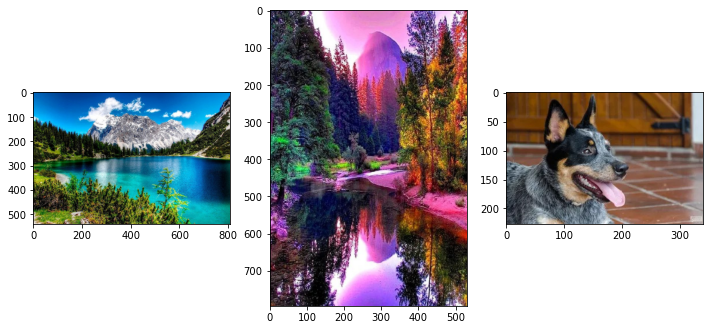

In [6]:
path1 = "imagen1/imagen1_salida_gray_azul.jpg"
path2 = "imagen1/imagen1_salida_gray_verde.jpg"
path3 = "imagen1/imagen1_salida_gray_rojo.jpg"
imagen_unida1 = unir_y_colorear_imagen(path1, path2, path3)

path1 = "imagen2/imagen2_salida_gray_azul.jpg"
path2 = "imagen2/imagen2_salida_gray_verde.jpg"
path3 = "imagen2/imagen2_salida_gray_rojo.jpg"
imagen_unida2 = unir_y_colorear_imagen(path1, path2, path3)

path1 = "perro/perro_salida_gray_azul.jpg"
path2 = "perro/perro_salida_gray_verde.jpg"
path3 = "perro/perro_salida_gray_rojo.jpg"
imagen_unida3 = unir_y_colorear_imagen(path1, path2, path3)

#Graficando

f, axarr = plt.subplots(1,3)
axarr[0].imshow(imagen_unida1)
axarr[1].imshow(imagen_unida2)
axarr[2].imshow(imagen_unida3)

# Problema 3
Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

In [7]:
def imagen_a_3d_gris(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #Dimensiones
    alto = img.shape[0]
    ancho = img.shape[1]
    
    #Se crea una imagen vacia a color (3 canales)
    lienzo_blue = np.zeros((alto, ancho, 1))
    lienzo_green = np.zeros((alto, ancho, 1))
    lienzo_red = np.zeros((alto, ancho, 1))
    
    #Ciclo for por cada imagen
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]
            #Se obtienen los colores
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            #Coloración
            lienzo_blue[i, j] = blue
            lienzo_green[i, j] = green
            lienzo_red[i, j] = red
    #Se debe escribir a disco y después leer
    cv2.imwrite("problema3_gray_blue.jpg", lienzo_blue)
    img_edited = cv2.imread("problema3.jpg")
    img_blue = cv2.cvtColor(img_edited, cv2.COLOR_BGR2RGB)
    #Se debe escribir a disco y después leer
    cv2.imwrite("problema3_gray_green.jpg", lienzo_green)
    img_edited = cv2.imread("problema3.jpg")
    img_green = cv2.cvtColor(img_edited, cv2.COLOR_BGR2RGB)
    #Se debe escribir a disco y después leer
    cv2.imwrite("problema3_gray_red.jpg", lienzo_red)
    img_edited = cv2.imread("problema3.jpg")
    img_red = cv2.cvtColor(img_edited, cv2.COLOR_BGR2RGB)
    
    #Regresando imagen
    return (img_blue, img_green, img_red)

Probando la función:

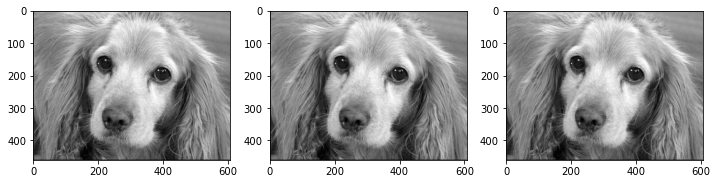

In [8]:
(imagen_blue, imagen_green, imagen_red) = imagen_a_3d_gris("bruno.jpg")

#Graficando imagen en 3d

f, axarr = plt.subplots(1,3)
axarr[0].imshow(imagen_blue)
axarr[1].imshow(imagen_green)
axarr[2].imshow(imagen_red)

En la siguiente prueba se uniran las imagenes generadas para crear la original:

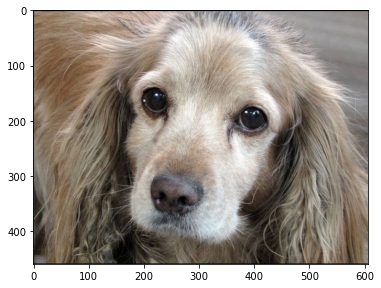

In [9]:
path1 = "problema3_gray_blue.jpg"
path2 = "problema3_gray_green.jpg"
path3 = "problema3_gray_red.jpg"
imagen_unida1 = unir_y_colorear_imagen(path1, path2, path3)

#Graficando

plt.rcParams["figure.figsize"] = (6, 5)
plt.imshow(imagen_unida1)
plt.show()
plt.rcParams["figure.figsize"] = (12, 9)

# Problema 4
Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media de la distribución.

In [10]:
def graficar_histograma(ax, repitencia, titulo):
    
    indices = np.array(list(range(0,256)))
    ax.bar(indices, repitencia, color = titulo)
    
    media = np.mean(repitencia)
    ax.axhline(y = media, linestyle = '-', color = "black", label="Media " + str(media))
    ax.legend()
    
    ax.set_title(titulo)

def graficar_histogramas(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #Dimensiones
    alto = img.shape[0]
    ancho = img.shape[1]
    
    #Imagen gris
    lienzo_gris_ponderado = np.zeros((alto, ancho, 1))
    
    #Frecuencias
    frecuencias_blue = np.zeros((256), dtype=int)
    frecuencias_green = np.zeros((256), dtype=int)
    frecuencias_red = np.zeros((256), dtype=int)
    frecuencias_gray = np.zeros((256), dtype=int)
    
    #Ciclo for por cada imagen
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]
            #Se obtienen los colores
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            gris = int(0.114*blue + 0.587*green + 0.299*red)
            #Imagen en gris ponderado
            lienzo_gris_ponderado[i, j] = gris
            #Frecuencias
            frecuencias_blue[blue] = frecuencias_blue[blue] + 1
            frecuencias_green[green] = frecuencias_green[green] + 1
            frecuencias_red[red] = frecuencias_red[red] + 1
            frecuencias_gray[gris] = frecuencias_gray[gris] + 1
    
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
    
    graficar_histograma(ax1, frecuencias_blue, "Blue")
    graficar_histograma(ax2, frecuencias_green, "Green")
    graficar_histograma(ax3, frecuencias_red, "Red")
    graficar_histograma(ax4, frecuencias_gray, "Gray")

Graficando histogramas:

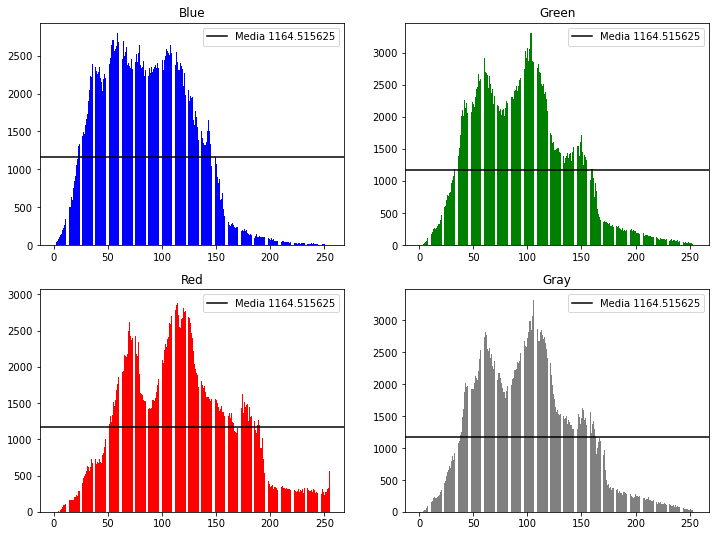

In [11]:
graficar_histogramas("viena.jpg")

# Problema 5
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una función que dada una imagen, realice una escala de grises ponderada (notar que no existe una solución única).

In [12]:
def gris_ponderado(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #Dimensiones
    alto = img.shape[0]
    ancho = img.shape[1]
    
    #Imagen gris
    lienzo_gris_ponderado = np.zeros((alto, ancho, 1))
    
    #Ciclo for por cada imagen
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]
            #Se obtienen los colores
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            #Imagen en gris ponderado
            lienzo_gris_ponderado[i, j] = int(0.114*blue + 0.587*green + 0.299*red)
    
    #Se debe escribir a disco y después leer
    cv2.imwrite("problema5.jpg", lienzo_gris_ponderado)
    img_edited = cv2.imread("problema5.jpg")
    img_edited = cv2.cvtColor(img_edited, cv2.COLOR_BGR2RGB)
    
    #Regresando imagen
    return img_edited

La formulara para el gris pondera do es la siguiente:

x = 0.114*blue + 0.587*green + 0.299*red

Esta formula es utilizada para evitar que diferentes colores tengan la misma tonalidad de gris. Esta formula también tiene en consideración que los colores no son iguales, el orden de los pesos es debido a que el color verde es más suave que el rojo, y este que el azul.

Implementando:

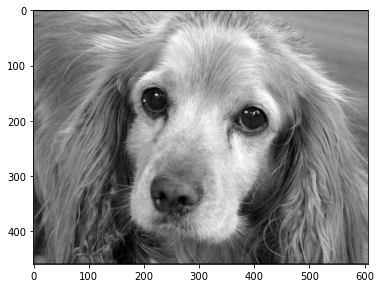

In [13]:
gris_ponderado = gris_ponderado("bruno.jpg")

#Graficando

plt.rcParams["figure.figsize"] = (6, 5)
plt.imshow(gris_ponderado)
plt.show()

# Problema 6
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook donde trabajó los demás ejercicios.

## Color HSV

Sus siglas en español significan: matiz, saturación y valor. Básicamente es una conversión de color RGB en donde la matiz es un valor de 0 a 360 grados, en donde 0 representa al rojo, 120 al verde y 240 al azul. A continuazción está la saturación, esta es la distancia al eje de brillo blanco-negro, si la saturación es 100% entonces es el color es puro, conforme más se acerca a 0% aumentarán los colores grises. Por último, está el valor, esto no es más que el color de saturación utilizado, donde 0% es blanco y 100% es negro.

A continuación una imagen que describe este sistema de selección de color:

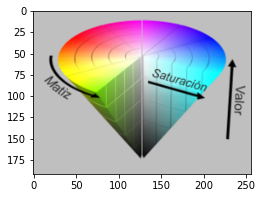

In [14]:
img = cv2.imread("hsv.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = (4, 3)
plt.imshow(img)
plt.show()